In [26]:
import librosa
import librosa.display as dsp
from IPython.display import Audio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

In [18]:
train = pd.read_csv('train.csv')
train

,file_name,label
0,001.wav,9
1,002.wav,0
2,004.wav,1
3,005.wav,8
4,006.wav,0
...,...,...
395,594.wav,8
396,595.wav,5
397,597.wav,9
398,598.wav,3


In [19]:
train.shape

(400, 2)

In [20]:
train.label.groupby(train.label).count()

label
0    40
1    40
2    40
3    40
4    40
5    40
6    40
7    40
8    40
9    40
Name: label, dtype: int64

## 오디오 시각화

In [21]:
def get_audio(num=0):
    sample = os.listdir('train')
    temp = train[train.label == num].file_name
    file_name = temp[temp.index[0]]

    file = 'train/' + file_name
    data, sample_rate = librosa.load(file)

    # plot audio wave
    dsp.waveshow(data, sr=sample_rate)
    plt.show()

    return Audio(data=data, rate=sample_rate)

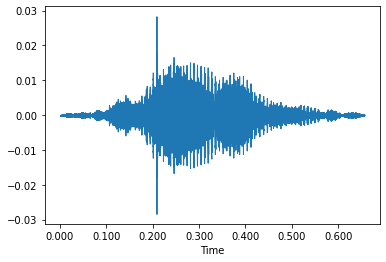

In [22]:
get_audio(0)

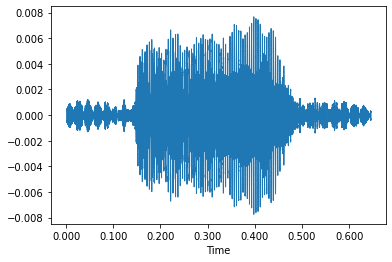

In [23]:
get_audio(1)

In [24]:
def fourier_transform(num=0):
    sample = os.listdir('train')
    temp = train[train.label == num].file_name
    file_name = temp[temp.index[0]]

    file = 'train/' + file_name
    data, sample_rate = librosa.load(file)

    fft = np.fft.fft(data)

    magnitude = np.abs(fft)
    freq = np.linspace(0, sample_rate, len(magnitude))

    left_freq = freq[:int(len(freq)/2)]
    left_magnitude = magnitude[:int(len(magnitude)/2)]

    fig = plt.figure(figsize = (14, 5))
    plt.plot(left_freq, left_magnitude)
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.title(f'Fourier transform of audio label: {num}')
    plt.show()

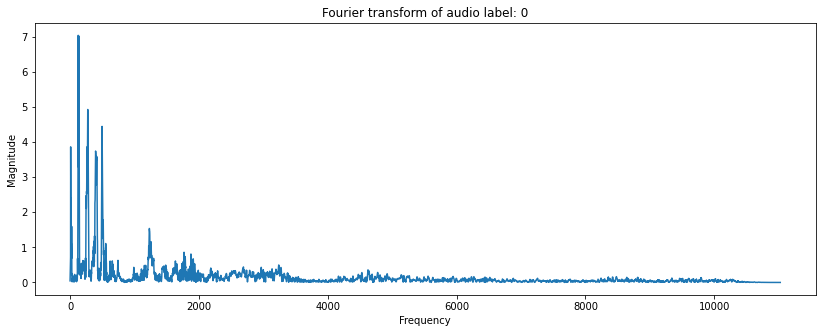

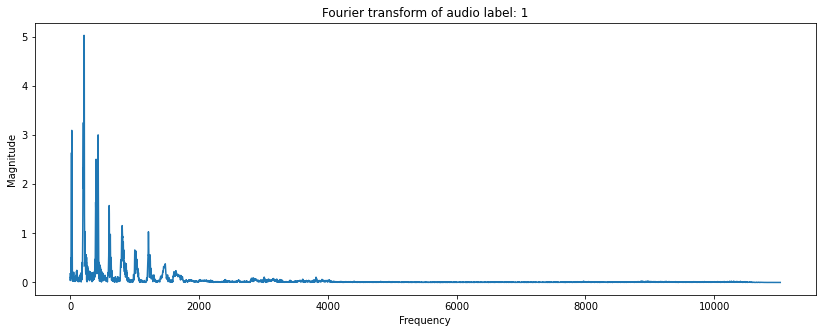

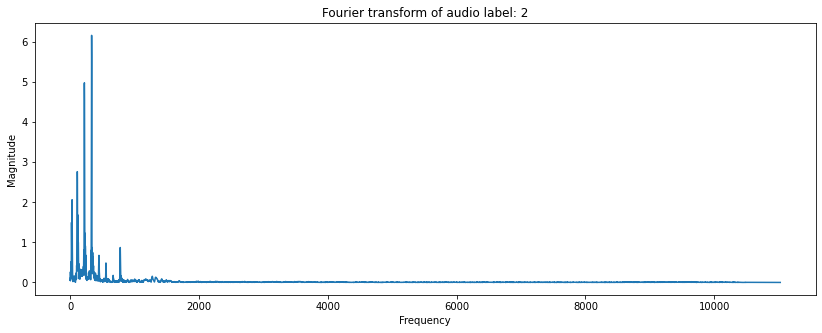

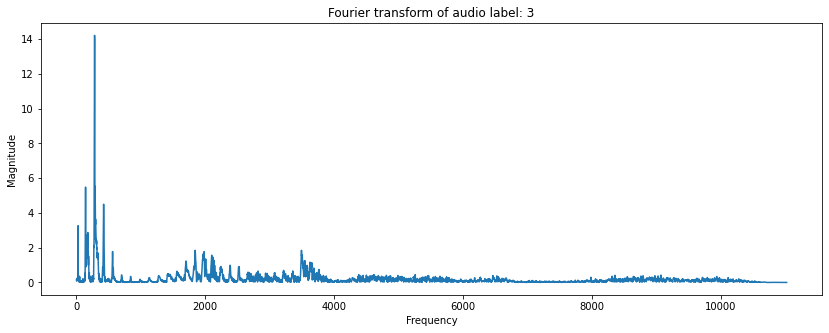

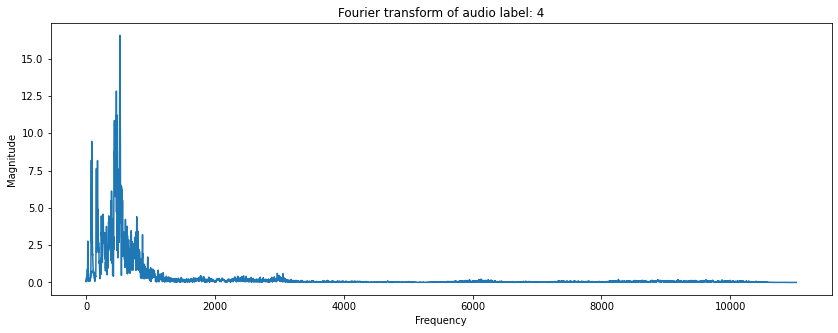

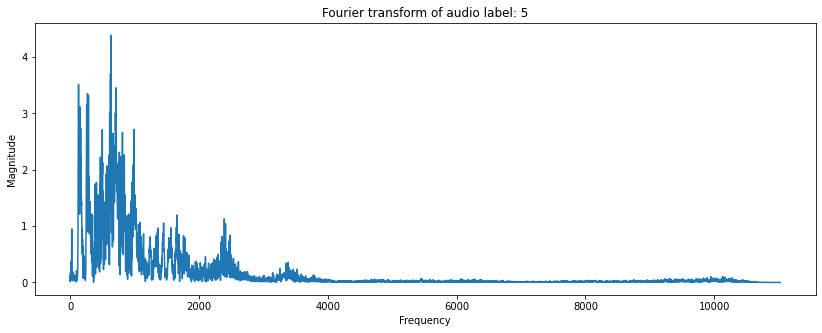

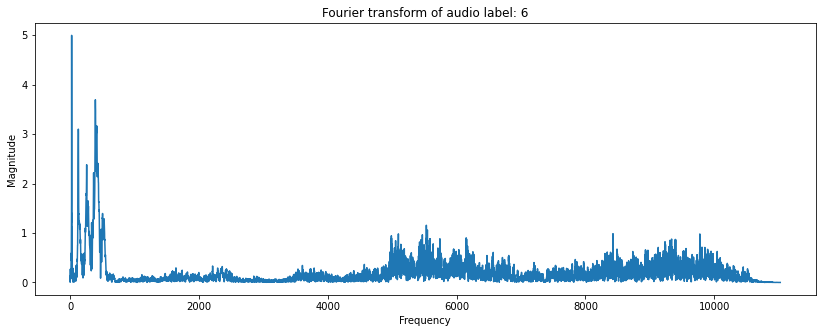

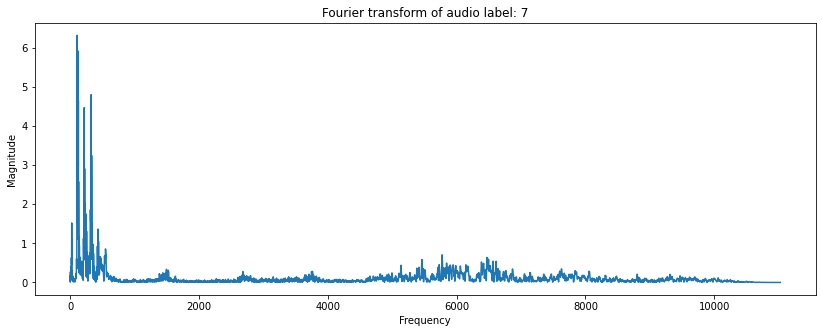

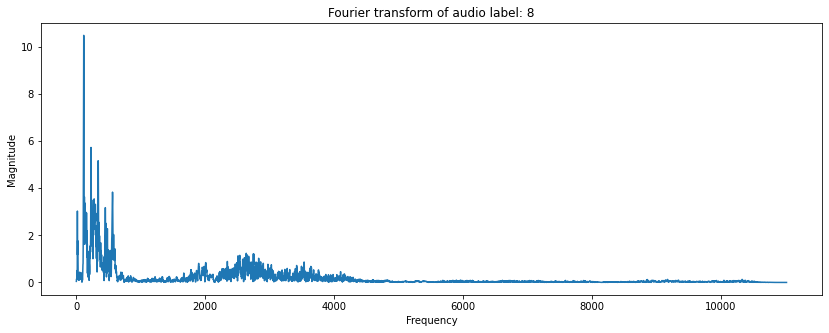

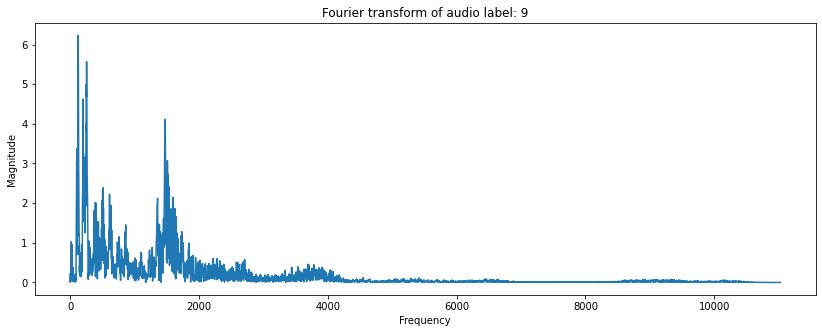

In [25]:
for i in range(0, 10):
    fourier_transform(i)

In [28]:
def seed_setting(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_setting(42)